# Lab #2: Probability, Distributions, and Statistical Questions

In [65]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math
import statistics


#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

## Problem 1

There is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. Let's assume for each day, the background follows a possion distribution with an average value of 8. And the average number of gamma-rays emitted by our hypothetical source is 3. 



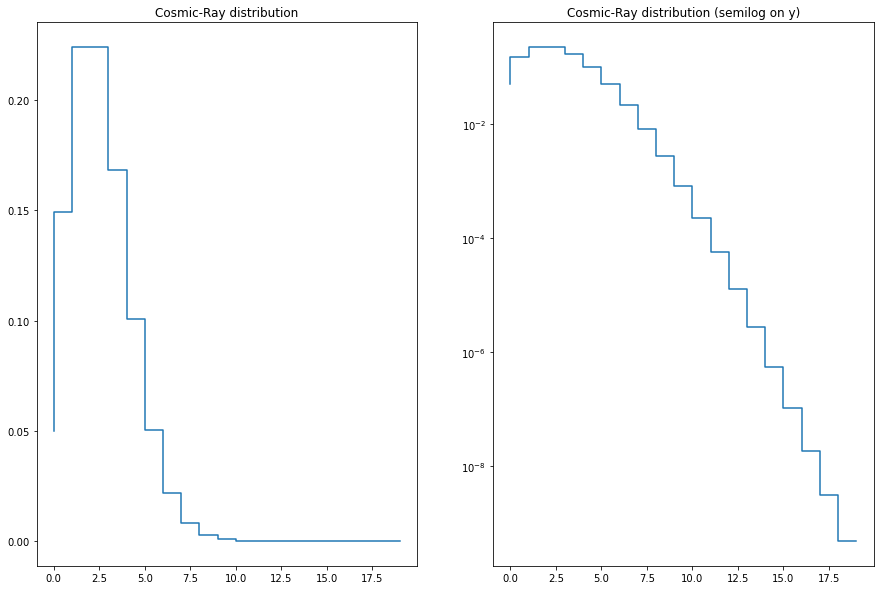

In [20]:
fig, ax = plt.subplots(1, 2)
x = np.arange(0, 20)
lamba = 3
p = stats.poisson.pmf(x, mu = lamba , loc = 0)
ax[0].step(x, p)
ax[0].set_title('Cosmic-Ray distribution')
plt.yscale('log')
ax[1].step(x, p)
ax[1].set_title('Cosmic-Ray distribution (semilog on y)')
plt.show()

**A. Now, let's see how does the probability distribution of the cosmic-ray change if we sum the distributions of two days up?**

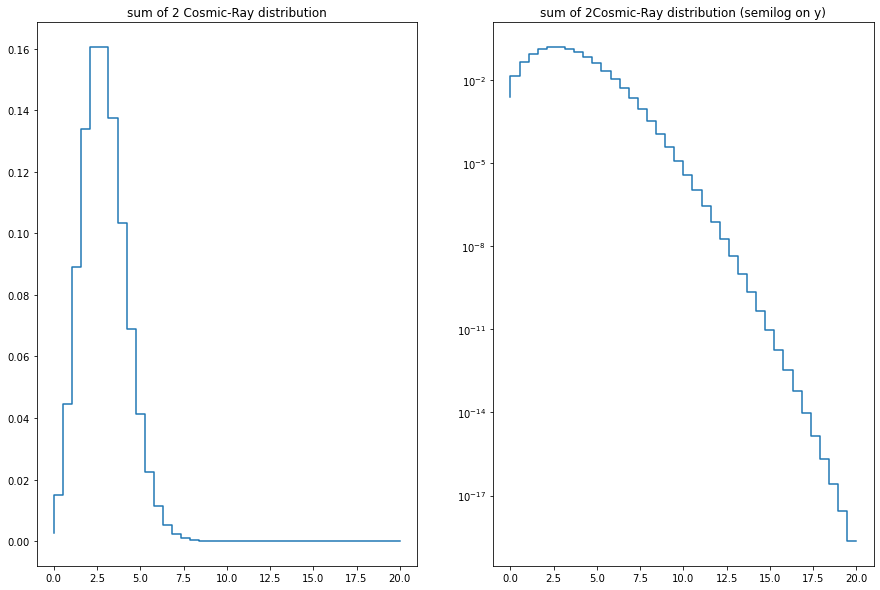

In [21]:
p2= np.convolve(p, p, 'full')
x = np.linspace(0, 20, len(p2))
fig, ax = plt.subplots(1, 2)
ax[0].step(x, p2)
ax[0].set_title('sum of 2 Cosmic-Ray distribution')
plt.yscale('log')
ax[1].step(x, p2)
ax[1].set_title('sum of 2Cosmic-Ray distribution (semilog on y)')
plt.show()

The convolved distribution still looks like a Poisson distribution ,with its mean unchanged.

**B. Now we look at the summed probability distribution after 5 days, by convolving five possion distributions together.**

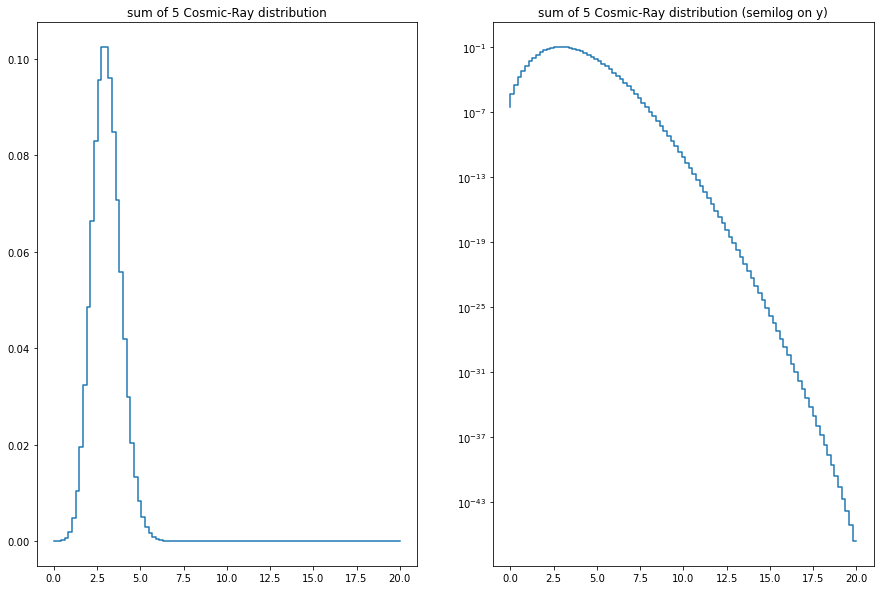

In [22]:
for times in range(3):
    p2 = np.convolve(p2, p, 'full')
x = np.linspace(0, 20, len(p2))
fig, ax = plt.subplots(1, 2)
ax[0].step(x, p2)
ax[0].set_title('sum of 5 Cosmic-Ray distribution')
plt.yscale('log')
ax[1].step(x, p2)
ax[1].set_title('sum of 5 Cosmic-Ray distribution (semilog on y)')
plt.show()

From the plot, the convolution of five poisson distributions still look like a possion distribution. And it indeed is! Mathematically, we can find out the convolution of two same poission distributions first.

$P(Y=y)=P(X_1+X_1=y)=\sum_{k=0}^{y}P(X_1=y-k)P(X_1=k)=\sum_{k=0}^{y}\frac{\lambda_1^{y-k}}{(y-k)!}e^{-\lambda_1}\frac{\lambda_1^k}{k!}e^{-\lambda_1}$

$=\frac1{y!}\sum_{k=0}^{y}\dbinom{y}{k}\lambda_1^{y-k}\lambda_1^ke^{-(\lambda_1+\lambda_1)}=\frac{(2\lambda_1)^y}{y!}e^{-2\lambda_1}$

The final convolved probability distribution is also in the form of a poisson distribution. By the same reasoning, the convoulutoin of five poisson distributions will end up being another poisson distributon.

And conceptually, the probability of the sum of two rare events happening will be more rare, but meanwhile, we are having more trails (common events). These two changes cancel off and result in another poisson distribution.

**C.** how does the probability distribution evolve as we average more days?

Let's try 10 days first.

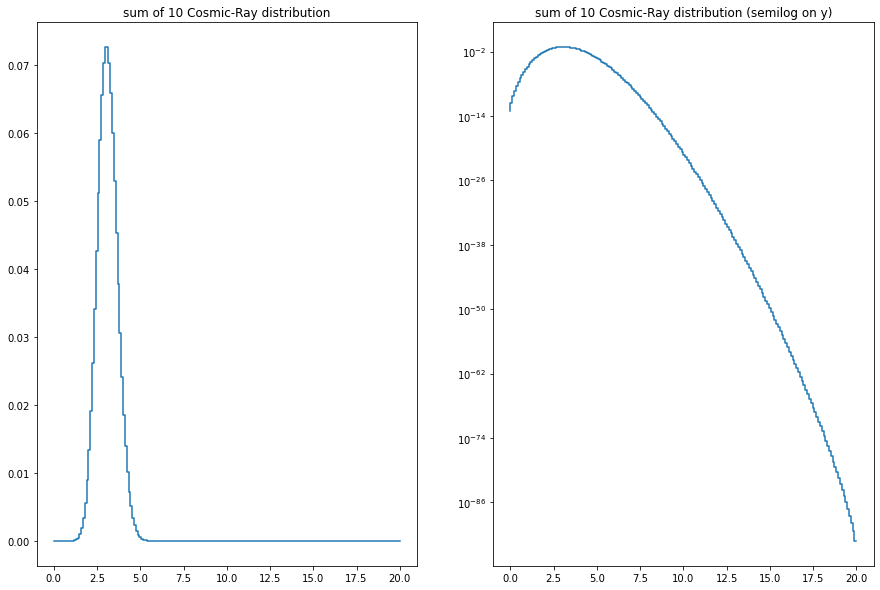

In [23]:
fig, ax = plt.subplots(1, 2)
p2= np.convolve(p, p, 'full')
for times in range(8):
    p2 = np.convolve(p2, p, 'full')
x = np.linspace(0, 20, len(p2))
ax[0].step(x, p2)
ax[0].set_title('sum of 10 Cosmic-Ray distribution')
plt.yscale('log')
ax[1].step(x, p2)
ax[1].set_title('sum of 10 Cosmic-Ray distribution (semilog on y)')
plt.show()

Now, 20.

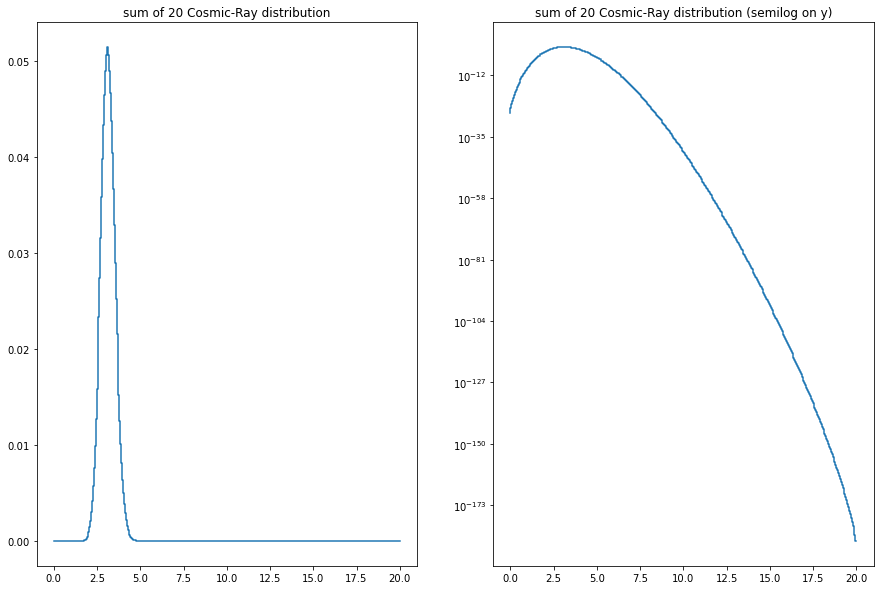

In [24]:
fig, ax = plt.subplots(1, 2)
p2= np.convolve(p, p, 'full')
for times in range(18):
    p2 = np.convolve(p2, p, 'full')
x = np.linspace(0, 20, len(p2))
ax[0].step(x, p2)
ax[0].set_title('sum of 20 Cosmic-Ray distribution')
plt.yscale('log')
ax[1].step(x, p2)
ax[1].set_title('sum of 20 Cosmic-Ray distribution (semilog on y)')
plt.show()

Now 50.

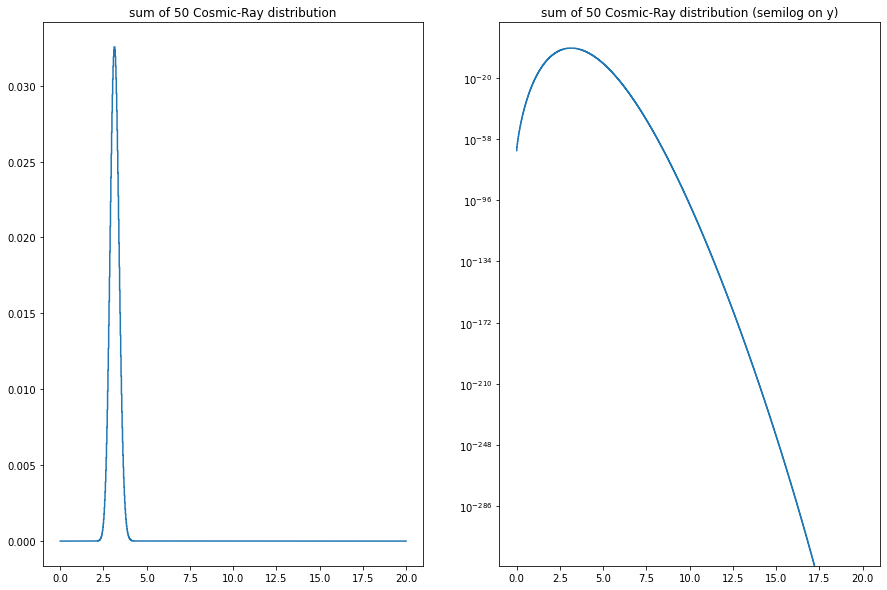

In [25]:
fig, ax = plt.subplots(1, 2)
p2= np.convolve(p, p, 'full')
for times in range(48):
    p2 = np.convolve(p2, p, 'full')
x = np.linspace(0, 20, len(p2))
ax[0].step(x, p2)
ax[0].set_title('sum of 50 Cosmic-Ray distribution')
plt.yscale('log')
ax[1].step(x, p2)
ax[1].set_title('sum of 50 Cosmic-Ray distribution (semilog on y)')
plt.show()

The distribution looks symmetric about x = 3, and the semilog graph looks perfectly like a parabola: the distribution is a Gaussian!. Indeed, a large number of Possion distribution will add up to be a Gaussian distribution by Central Limit Theorem. Mathematically, if $\lambda$ goes very large in the mathematical expression in part B, the expression can be written in the form of a Gaussian distribution(approximately)

**D.** Pick some number of days N, and assume we saw Y * N gamma rays from our source. Calculate the 'sigma' of our observation. We choose 15 as our value of N. Let's draw out the plot first.

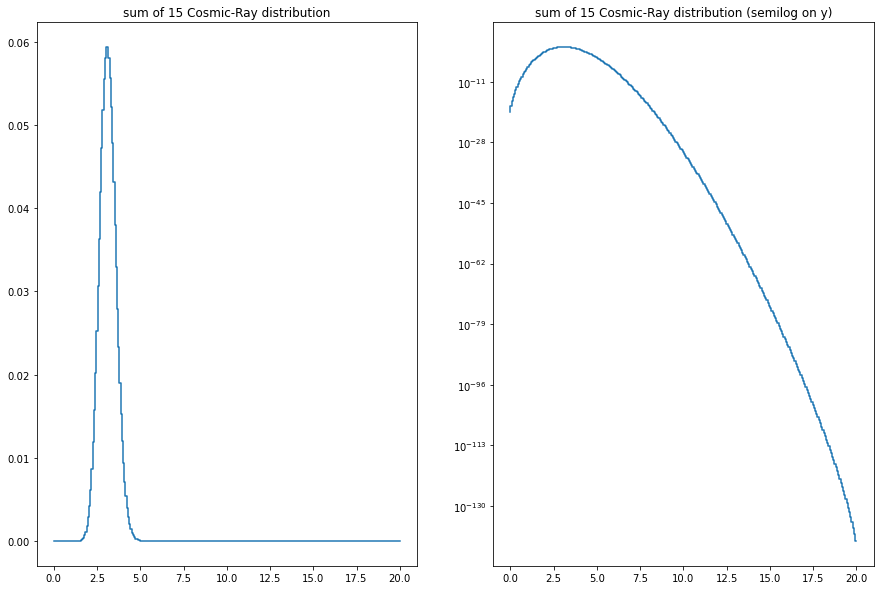

In [26]:
fig, ax = plt.subplots(1, 2)
p2= np.convolve(p, p, 'full')
for times in range(13):
    p2 = np.convolve(p2, p, 'full')
x = np.linspace(0, 20, len(p2))
ax[0].step(x, p2)
ax[0].set_title('sum of 15 Cosmic-Ray distribution')
plt.yscale('log')
ax[1].step(x, p2)
ax[1].set_title('sum of 15 Cosmic-Ray distribution (semilog on y)')
plt.show()

We sae Y * N gamma rays in total. Therefore, the averaged observed number of gamma rays will be Y * N / N = Y = 8. The probability can be calcualted by the same math we had in lab 1:$ P = \int_{8}^{\infty} f(x) \,dx  = 1 - F(8)$ However, since we have a discrete distribution, we need to sum up all the values that have their x-value less than 15 using summation 

In [27]:
x_index = int(np.nonzero(x == 8)[0]) #returns where x = 8 is located in our x-axis array
indices = range(x_index)
F_8 = np.sum(p2[indices]) #sum all the values of pmf with indices corresponding to x-value less than 8.
P_value = 1 - F_8
P_value

1.247160708039985e-09

Then we use ppf() on standard normal distribution to find out the equivalent $\sigma$ value.

In [28]:
sigma = stats.norm.ppf(1 - P_value, loc = 0, scale = 1)
sigma

5.961827663623497

The 'sigma' of our observation for 8 * 15 gamma rays is 5.962. 

## Problem 2

In this problem, we pick up a skewed continuous distribution, and we will see how it changes as we sum more of this distribution up. 

We are going to choose Chi-Squared distribution(with a degree of freedom of 3). First, let's plot the distribution itself.

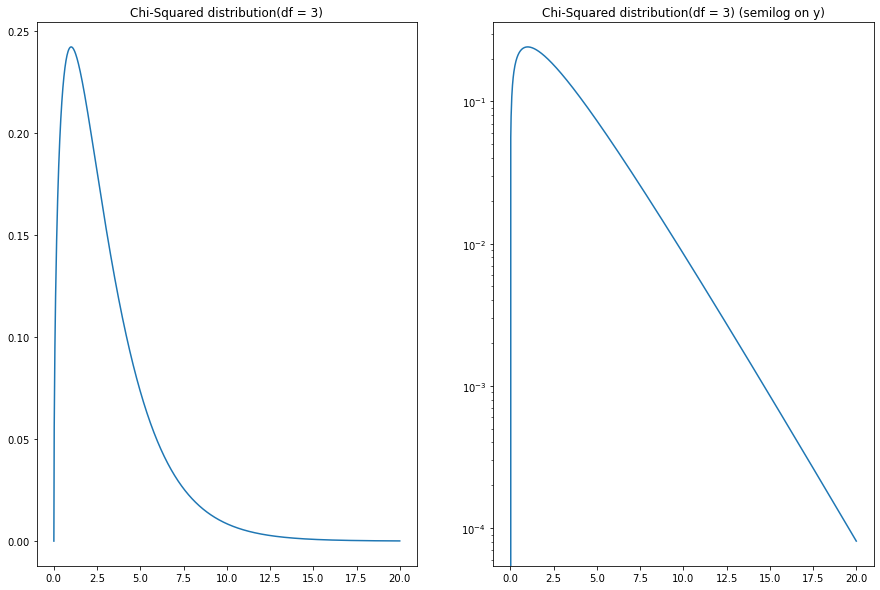

In [29]:
fig, ax = plt.subplots(1, 2)
x = np.linspace(0,20,1000)
ax[0].plot(x,stats.chi2.pdf(x, df = 3))
ax[0].set_title('Chi-Squared distribution(df = 3)')
plt.yscale('log')
ax[1].plot(x,stats.chi2.pdf(x, df = 3))
ax[1].set_title('Chi-Squared distribution(df = 3) (semilog on y)')
plt.show()

Now let's convolve two of the Chi-Squared distributions.


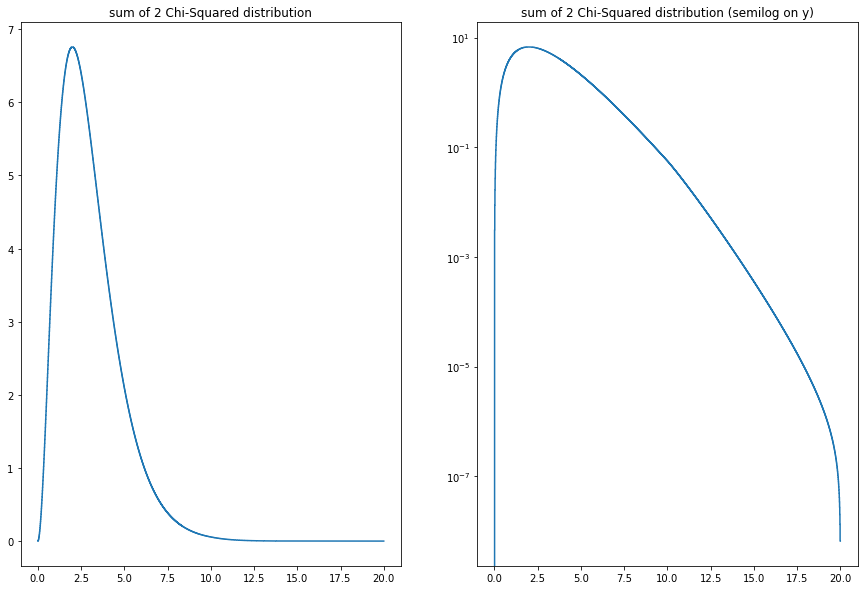

In [30]:
Chi_squared = stats.chi2.pdf(x, df = 3)
fig, ax = plt.subplots(1, 2)
Chi_2sum= np.convolve(Chi_squared, Chi_squared, 'full')
x = np.linspace(0, 20, len(Chi_2sum))
ax[0].step(x, Chi_2sum)
ax[0].set_title('sum of 2 Chi-Squared distribution')
plt.yscale('log')
ax[1].step(x, Chi_2sum)
ax[1].set_title('sum of 2 Chi-Squared distribution (semilog on y)')
plt.show()

No obvious change from the original distribution. Let's try 10 distributions summed together.

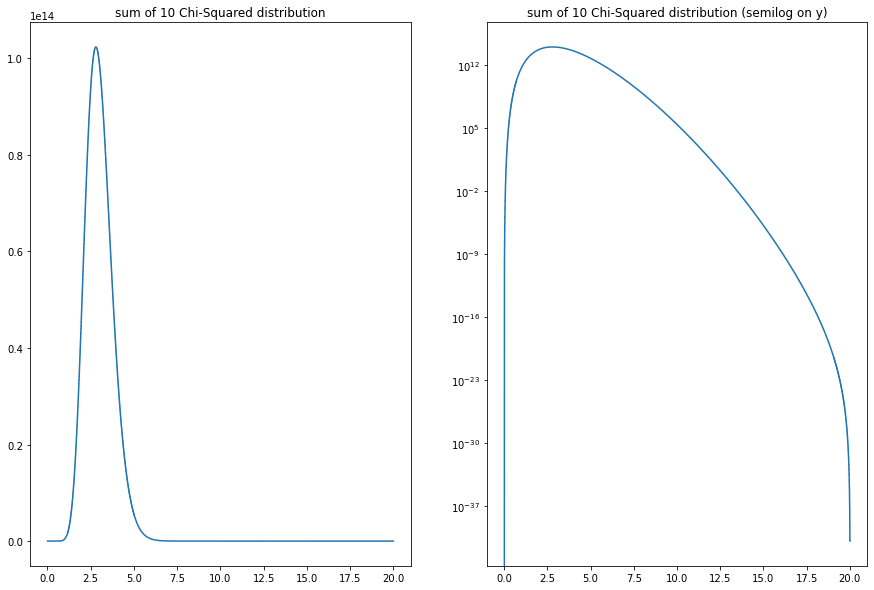

In [38]:
fig, ax = plt.subplots(1, 2)
Chi_10sum= np.convolve(Chi_squared, Chi_squared, 'full')
for times in range(8):
    Chi_10sum = np.convolve(Chi_10sum, Chi_squared, 'full')
x = np.linspace(0, 20, len(Chi_10sum))
ax[0].step(x, Chi_10sum)
ax[0].set_title('sum of 10 Chi-Squared distribution')
plt.yscale('log')
ax[1].step(x, Chi_10sum)
ax[1].set_title('sum of 10 Chi-Squared distribution (semilog on y)')
plt.show()

The graph is more symmetric and Gaussian-like compared to the sum of two Chi-Squared, but still skewed. Now we try 100, a large number.

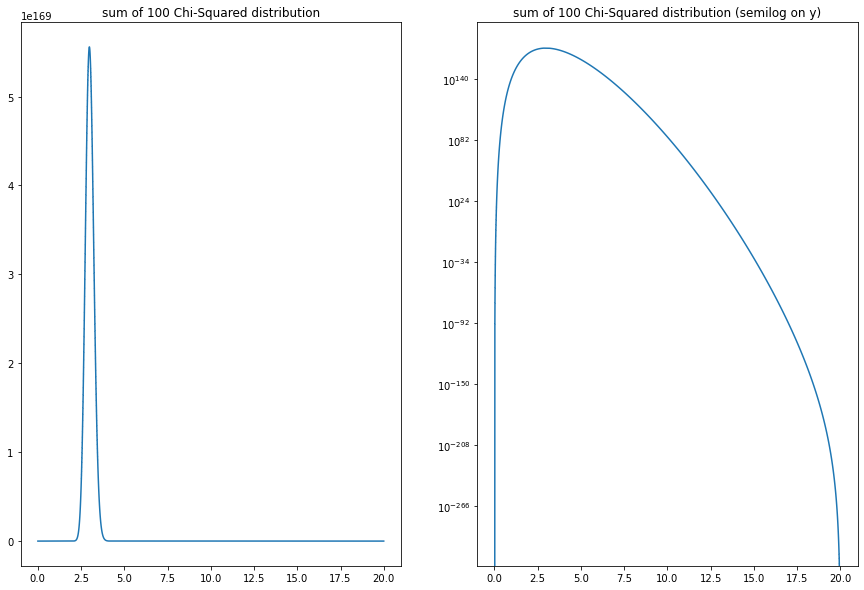

In [39]:
fig, ax = plt.subplots(1, 2)
Chi_100sum= np.convolve(Chi_squared, Chi_squared, 'full')
for times in range(100):
    Chi_100sum = np.convolve(Chi_100sum, Chi_squared, 'full')
x = np.linspace(0, 20, len(Chi_100sum))
ax[0].step(x, Chi_100sum)
ax[0].set_title('sum of 100 Chi-Squared distribution')
plt.yscale('log')
ax[1].step(x, Chi_100sum)
ax[1].set_title('sum of 100 Chi-Squared distribution (semilog on y)')
plt.show()

Now the graph looks just like a Gaussian! However, the semilog plot is still not a perfect parabola as Gaussian distribution is. So 100 is still not enough for getting a perfect Gaussian distribution. However, the python gives an runtime error message if we try more distributions because of the large size of the array. Therefore, we can only say it requires more than 100 Chi-Sqaured distributons to obtain a perfect Gaussian-like distribution.

## Problem 3

The discovery of optical/infra-red counterparts of Neutron star mergers initially detected with gravity-waves is one of the great discoverys in the last few years, and has ushered in the age of "multi-messenger astrophysics." The science that can be done by matching a gravity-wave signal (directly measures the mass of the neutron stars and their distance) with the optical emisson (redshift, nuclear astrophysics of the resulting explosion) is staggering. Lots of science from how the heaviest elements are formed to constraints on Dark Energy.

We're going to explore one of the analysis questions that comes up when looking for the optical counterparts (a new optical source) of a gravity wave signal. For this problem let's assume that we are using an optical telescope with a thermal noise background from the CCD (dark current, particularly an issue with older CCDs and/or infra-red CCDs). After flat-fielding, the background appears as a zero-mean Gaussian with constant width over the image.

### Version 1

We have an alert from LIGO that is also seen in with the X-ray/ultra-violet satellite SWIFT. SWIFT gives us a very precise location, so we take an image of that part of the sky. But because of SWIFT's accuracy, we know which pixel in your image to look for a counterpart in.

From looking at all the other pixels in our image, we can measure the width of the background Gaussian distribution X (Assuming it gives us an Gaussian with a standard deviation of **2.5**). Assuming we see a signal of strength Y (**Y = 9.35**). Calculate the significance of our detection. Can we claim a discovery (traditionally 5-sigma or more)?

Let's find the significance of our observation using cdf() on our background Gaussian distribution

In [52]:
p_value = 1 - stats.norm.cdf(9.35, loc=0, scale=2.5)
p_value

9.201012747406256e-05

We can find the corresponding $\sigma$ value using ppf() and stanard normal distribution.

In [53]:
sigma = - stats.norm.ppf(p_value, 0, 1)
sigma

3.7400000000001175

The corresponding sigma value we obtianed is about 3.74, which is less than 5. Unfortuantly we cannot claim a new discovery.

### Version 2

 If we have to look for a signal in 10k pixels, what is the probability distribution of our background? 

**B)** From lecture 2, we know the way to combine 10k background distributions will be multiply the value at each point of one gaussian distributions by 10k, which is still a gaussian, but higher y-value everywhere.

(0.0, 20.0)

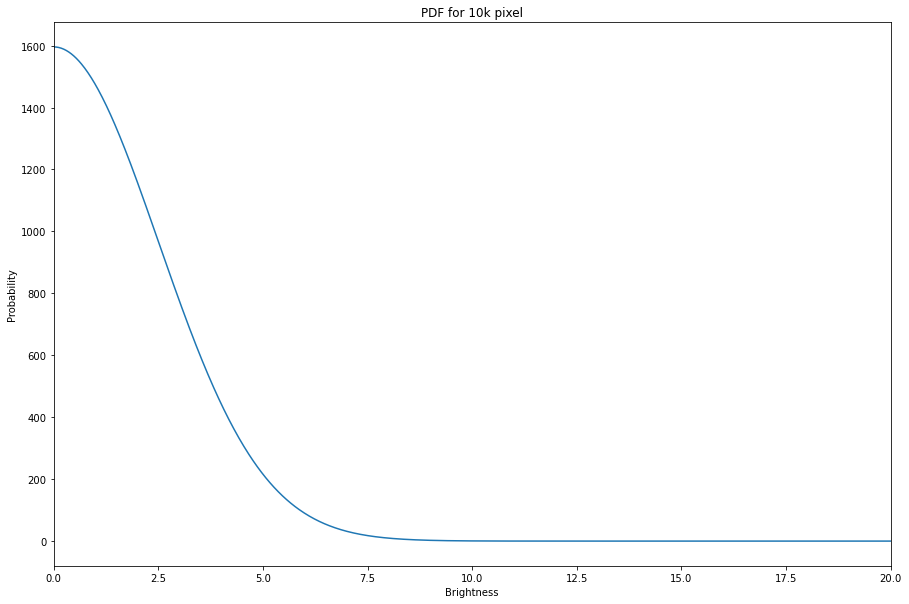

In [84]:
dist = stats.norm(scale=2.5)
x = np.linspace(0, 20, 1000)
plt.title("PDF for 10k pixel")
plt.xlabel("Brightness")
plt.ylabel("Probability")
plt.plot(x, dist.pdf(x) * 10000)
plt.xlim(0, 20)

**C) So what will our significance be for seeing our candidate signal (9.35) in this case? Or, What is the probability that the signal-free background data of 10,000 pixels produced a measurement that is as signal-like or more signal-like than 9.35?**

In [79]:
p_value = (1 - stats.norm.cdf(9.35, loc=0, scale=2.5)) * 10000
sigma = - stats.norm.ppf(1 - p_value, 0, 1)
sigma

1.4057531088384374

The corresponding sigma value turns out to be around 1.406, way below 5. Conceptually, although looking at multiple distributions gives us higher chance to observe a real detection, the chance of getting errors from random signals is also increased by the large number of trails. 

## Problem 4

*The statistical issue we were exploring in the previous problem is called a trials factor (sometimes known as a look-elsewhere effect). This is an important effect, as if you search through a million locations, you would expect to se ~1 one in a million event. However, it is also often over estimated how big an impact this makes on the sensitivity of a search. So in this part of the lab we are going to invert the problem.*

**A) Calculate the signal required for a 5-sigma detection in Version 1**

In [88]:
prob5sigma = 1/3.5e6
det = stats.norm.ppf( 1 - prob5sigma, loc = 0, scale = 2.5)
det

12.501578587325952

So the signal required for a 5-sigma detection in Version 1 will be around 12.503

**B) Calculate the signal required for a 5-sigma detection in Version 2**

In [90]:
det_2 = stats.norm.ppf( 1 - prob5sigma / 10000, loc = 0, scale = 2.5)
det_2

16.377565985128967

So the signal required for a 5-sigma detection in Version 2 will be around 16.378

**C) Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.**

In [92]:
det_2 / det

1.3100398378275584

The signal needs to be around 30% brighter for 10k than it needs to be for a singal trail. From the distribution, the plot drops dramatically as x-value goes larger. It means the probabilities barely changes for brightness far away from the mean: they are all very small.

**D) If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?**

We can try a few numbers of trials and see how they compare to each other. We can do 1, 10k, 100k, 1M, 10M

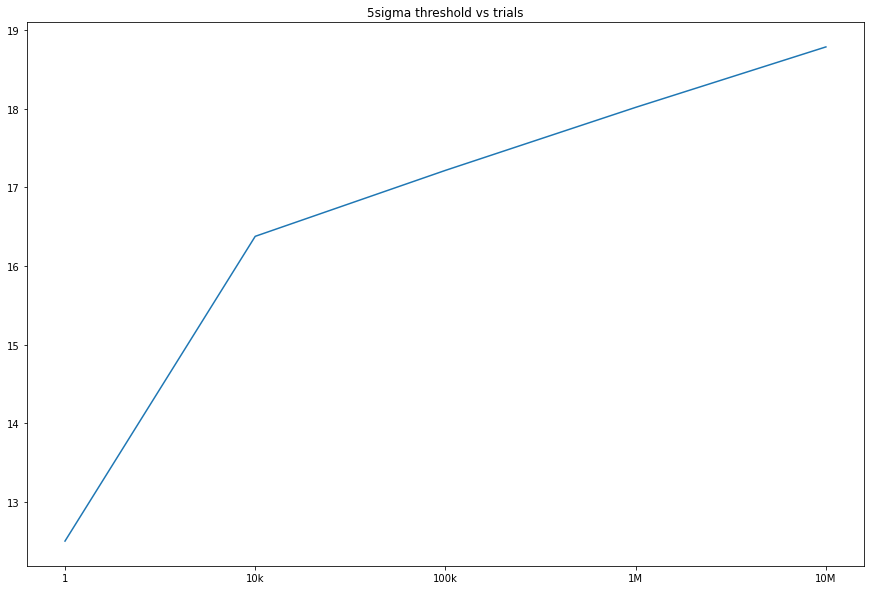

In [100]:
factor = []
factor.append(det)  #1 trial
factor.append(det_2) #10k trails
factor.append(stats.norm.ppf( 1 - prob5sigma / 100000, loc = 0, scale = 2.5) )  #100k
factor.append(stats.norm.ppf( 1 - prob5sigma / 1000000, loc = 0, scale = 2.5) )  #1M
factor.append(stats.norm.ppf( 1 - prob5sigma / 10000000, loc = 0, scale = 2.5) )  #
x = ['1', '10k', '100k','1M','10M']
fig, ax = plt.subplots(1, 1)
plt.title('5sigma threshold vs trials')
plt.plot(x, factor)
plt.show()

We can say the 5-sigma threshold is proportional to the logarithmic of number of trails.

 **If you had a different distribution shape (non-Gaussian), how would that affect the sensitivity penalty of many trials? Clearly explain.**

It will be dependent on how the shape of the distribution is skewed or formed. For example, we know Rayleigh has the shape that heavily skewed to right and narrow, which means the probability descreases rapidly as x value gets furthur. In this case, the sensitivity penalty will be lower than gaussian distribution. At the tail of Rayleigh, the probability does not change much as it has been decreased to almost 0.

In [101]:
det_21 = stats.rayleigh.ppf( 1 - prob5sigma, loc = 0, scale = 2.5)
det_22 = stats.rayleigh.ppf( 1 - prob5sigma / 10000, loc = 0, scale = 2.5)
det_22 / det_21

1.2693464744016203

As we can see, by conducting 10k trails, The signal needs to be around 30% brighter for 10k than it needs to be for a singal trail.